<a href="https://colab.research.google.com/github/plaban1981/Huggingface_transformers_course/blob/main/Huggingface_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pipelines

The  pipeline groups together three steps: 
* preprocessing, 
* passing the inputs through the model, and 
* postprocessing:

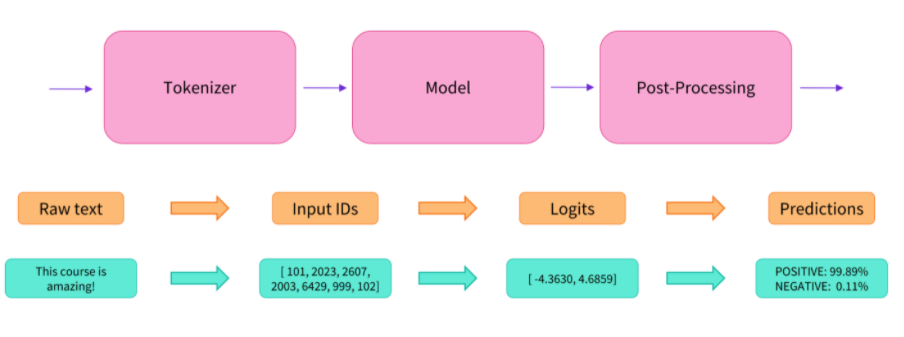

## Install Transformers

In [3]:
! pip install datasets transformers

## Preprocessing with a tokenizer

* Splitting the input into words, subwords, or symbols (like punctuation) that are called tokens
* Mapping each token to an integer
* Adding additional inputs that may be useful to the model

To do this, we use the **AutoTokenizer** class and its from_pretrained method. Using the checkpoint name of our model, it will automatically fetch the data associated with the model’s tokenizer and cache it (so it’s only downloaded the first time you run the code below).


* the the default checkpoint of the **sentiment-analysis** pipeline is **distilbert-base-uncased-finetuned-sst-2-english**

* Transformer models only accept tensors as input.
* To specify the type of tensors we want to get back (PyTorch, TensorFlow, or plain NumPy), we use the **return_tensors** argument

In [4]:
import transformers
from transformers import AutoTokenizer
#
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [5]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.", 
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


#### The output of tokenizer is a dictionary containing two keys
* **input_ids** and 
* **attention_mask**

In [6]:
print(inputs['input_ids'])

tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]])


In [7]:
print(inputs['input_ids'][0])

tensor([  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
         2607,  2026,  2878,  2166,  1012,   102])


In [17]:
print(inputs['input_ids'][0].shape)

torch.Size([16])


In [8]:
print(inputs['input_ids'][1])

tensor([ 101, 1045, 5223, 2023, 2061, 2172,  999,  102,    0,    0,    0,    0,
           0,    0,    0,    0])


In [10]:
len(inputs['input_ids'][1]),len(inputs['input_ids'][0])

(16, 16)

* In text 2 the sentence has been padded to match the length with sentence 1 hence we see zeros in the input_ids

## Going through the model

*  🤗 Transformers provides an **AutoModel** class which also has a from_pretrained method
* This architecture contains only the base Transformer module
* Given some inputs, it outputs hidden states, also known as features.
* For each model input, we’ll retrieve a high-dimensional vector representing the **contextual understanding of that input by the Transformer model**.
* these hidden states or features are usually inputs to another part of the model, known as the **head**.

In [12]:
from transformers import AutoModel
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias', 'classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([2, 16, 768])


#### The vector output by the Transformer module is usually large. It generally has three dimensions:

* **Batch size**: The number of sequences processed at a time (2 in our example as we have 2 input sentences).
* **Sequence length**: The length of the numerical representation of the sequence (16 in our example, length of the largest sentence).
* **Hidden size**: The vector dimension of each model input.


The outputs of 🤗 Transformers models behave like namedtuples or dictionaries.

In [13]:
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1798,  0.2333,  0.6321,  ..., -0.3017,  0.5008,  0.1481],
         [ 0.2758,  0.6497,  0.3200,  ..., -0.0760,  0.5136,  0.1329],
         [ 0.9046,  0.0985,  0.2950,  ...,  0.3352, -0.1407, -0.6464],
         ...,
         [ 0.1466,  0.5661,  0.3235,  ..., -0.3376,  0.5100, -0.0561],
         [ 0.7500,  0.0487,  0.1738,  ...,  0.4684,  0.0030, -0.6084],
         [ 0.0519,  0.3729,  0.5223,  ...,  0.3584,  0.6500, -0.3883]],

        [[-0.2937,  0.7283, -0.1497,  ..., -0.1187, -1.0227, -0.0422],
         [-0.2206,  0.9384, -0.0951,  ..., -0.3643, -0.6605,  0.2407],
         [-0.1536,  0.8988, -0.0728,  ..., -0.2189, -0.8528,  0.0710],
         ...,
         [-0.3017,  0.9002, -0.0200,  ..., -0.1082, -0.8412, -0.0861],
         [-0.3338,  0.9674, -0.0729,  ..., -0.1952, -0.8181, -0.0634],
         [-0.3454,  0.8824, -0.0426,  ..., -0.0993, -0.8329, -0.1065]]],
       grad_fn=<NativeLayerNormBackward>), hidden_states=None, attentions=None)


In [16]:
print(outputs[0].shape)

torch.Size([2, 16, 768])


## Model heads: Making sense out of numbers

The model heads take the high-dimensional vector of hidden states as input and project them onto a different dimension. They are usually composed of one or a few linear layers:

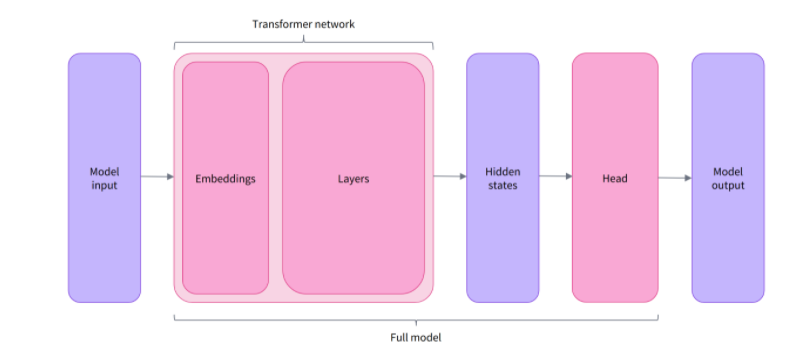

The output of the Transformer model is sent directly to the model head to be processed.

* Here he model is represented by its embeddings layer and the subsequent layers
* The embeddings layer converts each input ID in the tokenized input into a vector that represents the associated token
* The subsequent layers manipulate those vectors using the attention mechanism to produce the final representation of the sentence